In [4]:
import pandas as pd
df = pd.read_csv("asthma_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [3]:
import matplotlib.pyplot as plt

### Problem 1: Age Distribution
Create a histogram to visualize the distribution of ages in the dataset.

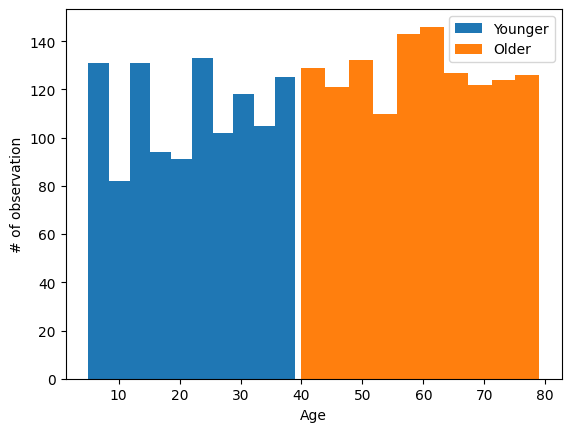

In [13]:
fig, ax = plt.subplots()

younger = df['Age'] < 40
older = df['Age'] >= 40

ax.hist(df[younger]["Age"], histtype='stepfilled', label='Younger')
ax.hist(df[older]["Age"], histtype='stepfilled', label='Older')

ax.set_xlabel("Age")
ax.set_ylabel("# of observation")

plt.legend()
plt.show()

#### Hulosa qilib aytadigan bo'lsak astma kasalligi bilan kasallanganlarni yarimidan ko'prog'i 40 yoshdan yuqorilar hisoblanishadi. 

### Problem 2: Gender vs. Asthma Diagnosis
Create a bar chart to show the count of asthma diagnoses (0 or 1) for each gender.

Text(0, 0.5, '# of patient')

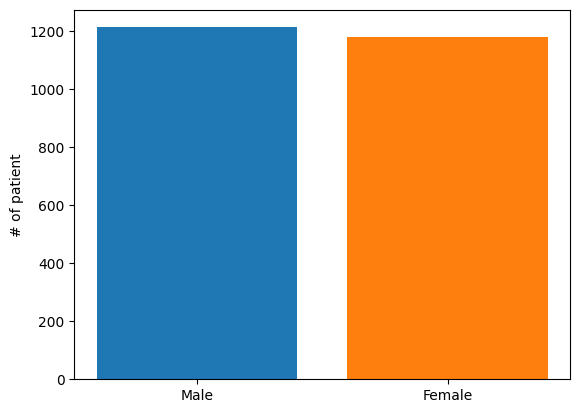

In [20]:
fig, ax = plt.subplots()

male = df[df["Gender"] == 0]["Gender"]
female = df[df["Gender"] == 1]["Gender"]

ax.bar("Male", male.value_counts())
ax.bar("Female", female.value_counts())

ax.set_ylabel("# of patient")

#### Hulosa: Astma kasalligining tarqalishi jinsga bog'liq emas ya'ni, kasallanish ehtimolligi erkaklar va ayollar uchun bir xil.

### Problem 3: Sleep Quality Distribution by Diagnosis
Create box plots to compare the distribution of sleep quality between patients diagnosed with asthma (1) and those not diagnosed with asthma (0).

Text(0, 0.5, 'Avg sleep quality')

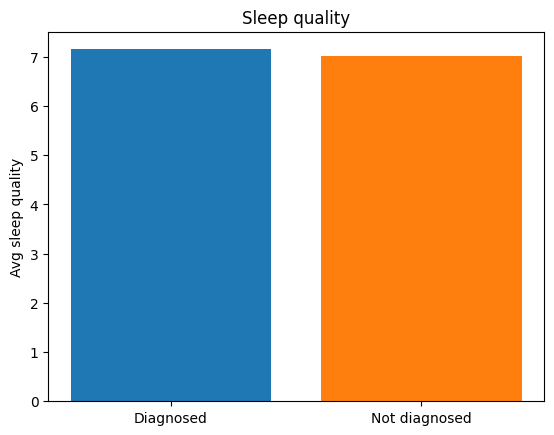

In [80]:
diagnosis_yes = df[df["Diagnosis"] == 1]
diagnosis_no = df[df["Diagnosis"] == 0]

fig, ax = plt.subplots()

ax.bar("Diagnosed", diagnosis_yes["SleepQuality"].mean())
ax.bar("Not diagnosed", diagnosis_no["SleepQuality"].mean())

ax.set_title("Sleep quality")
ax.set_ylabel("Avg sleep quality")

Text(0, 0.5, 'Sleep quality')

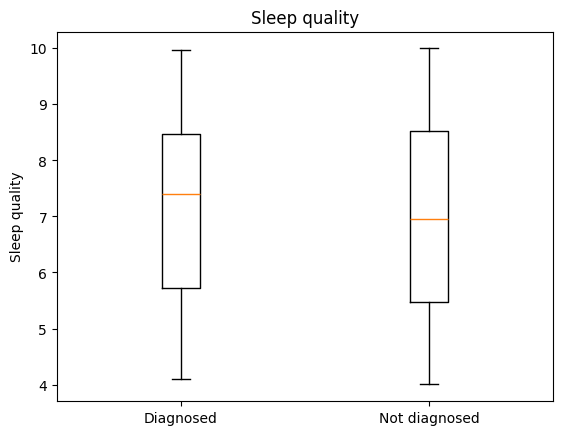

In [83]:
diagnosis_yes = df[df["Diagnosis"] == 1]
diagnosis_no = df[df["Diagnosis"] == 0]

fig, ax = plt.subplots()

ax.boxplot([diagnosis_yes["SleepQuality"], diagnosis_no["SleepQuality"]])
ax.set_xticklabels(["Diagnosed", "Not diagnosed"])

ax.set_title("Sleep quality")
ax.set_ylabel("Sleep quality")

#### Sleep quality range from 4 to 10 ligini hisobga olsak diagnoz qilingan va qilinmagan bemorlarda uxlash sifati yaxshi holatda. Bar chartdan ko'rinib turiptiki Kasallik sleep qualityga kuchli ta'sir qilmaydi degan hulosaga kelish mumkin.

### Problem 4: BMI Categories vs. Lung Function (FEV1)
Create box plots to compare the lung function (FEV1) across different BMI categories. You can define BMI categories such as underweight, normal weight, overweight, and obese.

In [77]:
underweight = df[df["BMI"] < 18.5]

upper = df["BMI"] > 18.5
under = df["BMI"] < 24.9
normal_weight = df[upper & under]

upper2 = df["BMI"] > 25
under2 = df["BMI"] < 29.9
overweight = df[upper & under]

obese = df[df["BMI"] > 30]



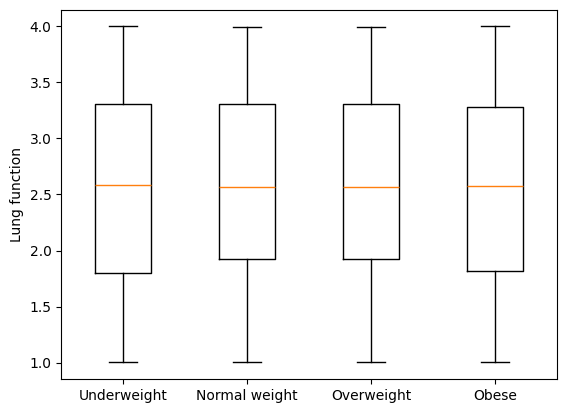

In [78]:
fig, ax = plt.subplots()
ax.boxplot([underweight["LungFunctionFEV1"], normal_weight["LungFunctionFEV1"], overweight["LungFunctionFEV1"], obese["LungFunctionFEV1"]])

ax.set_xticklabels(["Underweight", "Normal weight", "Overweight", "Obese"])
ax.set_ylabel("Lung function")

plt.show()


#### Hulosa qilib aytadigan bo'lsak normal lung function(fev1) (4.5 to 3.5 liters in males and from 3.25 to 2.5 liters in females) ga nisbatan asmatiklarda nafas olishda yutiladigan havo miqdori past. 

### Problem 5: Physical Activity Levels
Create a bar chart to visualize the average physical activity levels for patients with and without asthma diagnoses.

Text(0, 0.5, 'Physical activity')

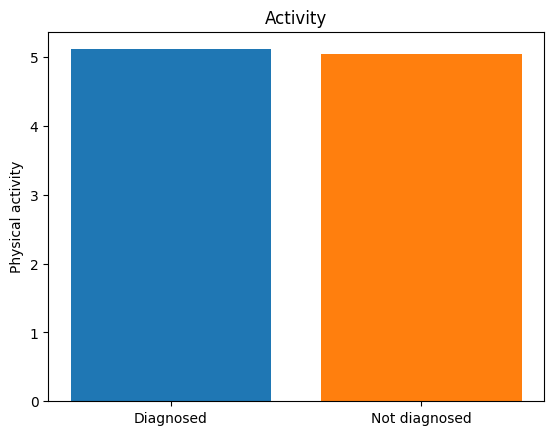

In [84]:
diagnosis_yes = df[df["Diagnosis"] == 1]
diagnosis_no = df[df["Diagnosis"] == 0]

fig, ax = plt.subplots()

ax.bar("Diagnosed", diagnosis_yes["PhysicalActivity"].mean())
ax.bar("Not diagnosed", diagnosis_no["PhysicalActivity"].mean())

ax.set_title("Activity")
ax.set_ylabel("Physical activity")

#### Hulosa fizikal aktivlik 0 dan 10 gacha oraliqda beldilangan. Korinib turiptiki o'rtacha aktivlik 50 % atrofida. Demak Kasallanganlarda fizikal aktivlik past.